<a href="https://colab.research.google.com/github/suryadeepti/tf_MNIST/blob/main/MNIST_(numpy_%26_tf)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
  
learn = tf.contrib.learn 
  
tf.logging.set_verbosity(tf.logging.ERROR) 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
mnist = learn.datasets.load_dataset('mnist') 
data = mnist.train.images 
labels = np.asarray(mnist.train.labels, dtype=np.int32) 
test_data = mnist.test.images 
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [ ]:
max_examples = 10000
data = data[:max_examples] 
labels = labels[:max_examples]

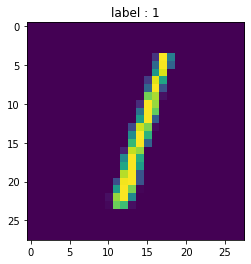

In [ ]:
def display(i): 
    img = test_data[i] 
    plt.title('label : {}'.format(test_labels[i])) 
    plt.imshow(img.reshape((28, 28))) 
      
# image in TensorFlow is 28 by 28 px  //You can take any
display(2) 

In [ ]:
feature_columns = learn.infer_real_valued_columns_from_input(data) 
classifier = learn.LinearClassifier(n_classes=10,  
                                    feature_columns=feature_columns) 
classifier.fit(data, labels, batch_size=100, steps=1000) 
\

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7efe918b58d0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [ ]:
classifier.evaluate(test_data, test_labels) 
print(classifier.evaluate(test_data, test_labels)["accuracy"]) 

0.9137


In [ ]:
prediction = classifier.predict(np.array([test_data[2]],  
                                         dtype=float),  
                                         as_iterable=False) 
print("prediction : {}, label : {}".format(prediction,  
      test_labels[0]) )

prediction : [1], label : 7


In [ ]:
########################################## TF training using Keras  ##############################################################3

In [ ]:
mnist = tf.keras.datasets.mnist 
(x_train,y_train) , (x_test,y_test) = mnist.load_data() 
  
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1)

11493376/11490434 [==============================] - 0s 0us/step


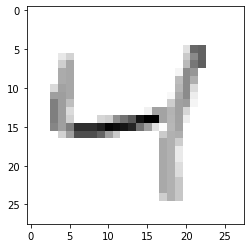

In [ ]:
def draw(n): 
    plt.imshow(n,cmap=plt.cm.binary) 
    plt.show()  
      
draw(x_train[2]) 

In [ ]:
#there are two types of models 
#sequential is most common, why? 
  
model = tf.keras.models.Sequential() 
  
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) 
#reshape 
  
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) 
  
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              ) 
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2677 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1087 - acc: 0.9662
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0738 - acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0535 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0408 - acc: 0.9868


In [ ]:
val_loss,val_acc = model.evaluate(x_test,y_test) 
print("loss-> ",val_loss,"\nacc-> ",val_acc) 

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0841 - acc: 0.9759
loss->  0.08408725895970129 
acc->  0.9759


lable ->  1
prediction ->  1


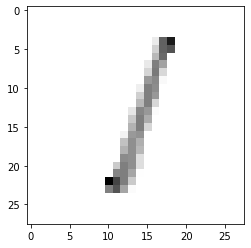

In [ ]:
predictions=model.predict([x_test]) 
print('lable -> ',y_test[2]) 
print('prediction -> ',np.argmax(predictions[2])) 
  
draw(x_test[2])

In [ ]:
model.save('epic_num_reader.h5') 

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.h5') 


lable ->  1
prediction ->  1


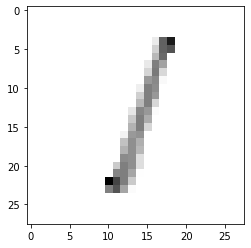

In [ ]:
predictions=new_model.predict([x_test]) 
print('lable -> ',y_test[2]) 
print('prediction -> ',np.argmax(predictions[2])) 

draw(x_test[2]) 